In [2]:
import numpy as np
from scipy.integrate import quad
def erf_asy(x):
    a1, a2, a3, a4, a5 = 0.254829592, -0.284496736, 1.421413741, -1.453152027, 1.061405429
    p = 0.3275911

    sign = np.sign(x)  # Element-wise sign function
    x = np.abs(x)
    t = 1 / (1 + p * x)
    y = 1 - (((((a5 * t + a4) * t + a3) * t + a2) * t + a1) * t * np.exp(-x * x))
    return sign * y

def phi(x):
    return 0.5 * (1 + np.erf(x / np.sqrt(2)))

from scipy.special import erfinv

def phi_inv(p):
    return np.sqrt(2) * erfinv(2*p - 1)

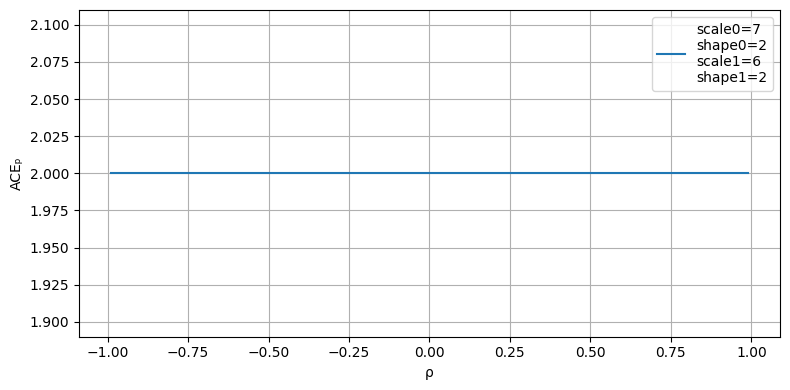

In [3]:
from scipy.stats import norm
y = 10
y_=8
scale0, scale1 = 7, 6#xm parameter
shape0, shape1 = 2, 2#tail(alpha) parameter

def F_Y1(y,scale1,shape1):
    if(y>=scale1):
        temp=(scale1/y)**shape1
        return 1-temp
    else:
        return 0

def F_Y0(y,scale0,shape0):
    if (y>=scale0):
        temp=(scale0/y)**shape0
        return 1-temp
    else:
        return 0


u0 = F_Y0(y_,scale0,shape0)
u1 = F_Y1(y,scale1,shape1)
a0=norm.ppf(u0)
a1=norm.ppf(u1)

def f1(y,scale1,shape1):
    if(y>=scale1):
        ans=shape1*scale1**shape1
        ans=ans/(y**(shape1+1))
        return ans
    else:
        return 0


import numpy as np

def my_integrand(z, rho, a0):
    den = np.sqrt(2*(1 - rho**2))
    c2=norm.ppf(F_Y1(z,scale1,shape1))
    temp=f1(z,scale1,shape1)/(norm.pdf(c2))
    c1=(c2-rho*a0)/den
    return np.exp(-(c1**2))*temp

def Integrat_quad_f1(a, b,rho):
    g= lambda y: f1(y,scale0,shape0)
    temp_val,temp_error=quad(g,-np.inf,np.inf,limit=10000)
    f = lambda z: z*f1(z,scale1,shape1)
    val ,error= quad(f, a, b,limit=10000)
    return val*temp_val

def Integrat_quad_f0(a, b,rho):
    g= lambda y: f1(y,scale1,shape1)
    temp_val,temp_error=quad(g,-np.inf,np.inf,limit=10000)
    f = lambda z: z*f1(z,scale0,shape0)
    val ,error= quad(f, a, b,limit=10000)
    return val*temp_val

def ACE(rho):
    ans=Integrat_quad_f0(-np.inf,np.inf,rho)-Integrat_quad_f1(-np.inf,np.inf,rho)
    return ans
rho=np.linspace(-0.99,0.99,200)

ACE_vals=[ACE(r) for r in rho]


import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(rho, ACE_vals, label=f'scale0={scale0}\nshape0={shape0}\nscale1={scale1}\nshape1={shape1}')

ax.set_xlabel('ρ')
ax.set_ylabel('ACEₚ')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()